explained variance ratio (first two components): [0.92461872 0.05306648]


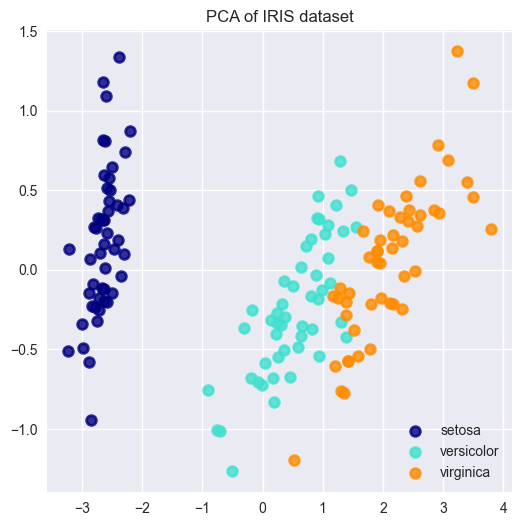

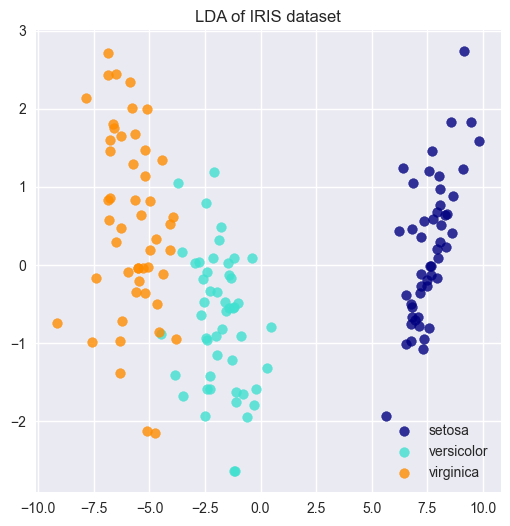

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap2\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
import matplotlib as mpl
# 导入线性和二次判别分析工具
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 加载数据集
from sklearn.datasets import load_iris
# 导入PCA工具
from sklearn.decomposition import PCA
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# 建立PCA模型，指定两个主成分
pca = PCA(n_components=2)
# 模型拟合
pca.fit(X)
# 主成分的值
X_r = pca.transform(X)
# 建立LDA模型，两个主成分
lda = LinearDiscriminantAnalysis(n_components=2)
# 模型拟合
lda.fit(X, y)
# 计算主成分的值
X_r2 = lda.transform(X)
# 方差解释比
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
# 开始绘图
fig1, ax = plt.subplots(figsize=(6,6))
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(
        X_r[y == i, 0], # 第一主成分，分类别
        X_r[y == i, 1], # 第二主成分，分类别
        color=color, alpha=0.8, 
        lw=lw, label=target_name
    )
ax.legend(loc="best", shadow=False, scatterpoints=1)
ax.set_title("PCA of IRIS dataset")
plt.show()
fig1.savefig("../codeimage/code2.pdf")

fig2, ax = plt.subplots(figsize=(6,6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(
        X_r2[y == i, 0], 
        X_r2[y == i, 1], 
        alpha=0.8, color=color, 
        label=target_name
    )
ax.legend(loc="best", shadow=False, scatterpoints=1)
ax.set_title("LDA of IRIS dataset")
plt.show()
fig2.savefig("../codeimage/code3.pdf")
